## Sentiment Analysis of Mastodon and X Tweets

In [1]:
%pip install nltk
%pip install langdetect


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

                                              0.0/981.5 kB ? eta -:--:--
     ------------------------------        809.0/981.5 kB 25.8 MB/s eta 0:00:01
     ------------------------------------- 981.5/981.5 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993253 sha256=4deb7ae89a6b69ac5bc39c5cb59775f54e428f6e64a27c927ae437212c23c9e1
  Stored in directory: c:\users\yttan\appdata\local\pip\cache\wheels\0a\f2\b2\e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from langdetect import detect
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords

##### Load Data from CSV files

In [3]:
twitter_df = pd.read_csv("x_tweets.csv")
mastodon_df = pd.read_csv("mast_toots.csv")
mastodon_ai_df = pd.read_csv("ai_toots.csv")

### Mastodon toot Analysis & Cleaning

In [4]:
lang_count = mastodon_df['language'].value_counts()
lang_count.values

array([2769,  369,  318,  212,  130,  127,   42,   41,   39,   30,   24,
         14,   12,   10,    8,    7,    6,    5,    4,    4,    4,    2,
          2,    2,    2,    2,    2], dtype=int64)

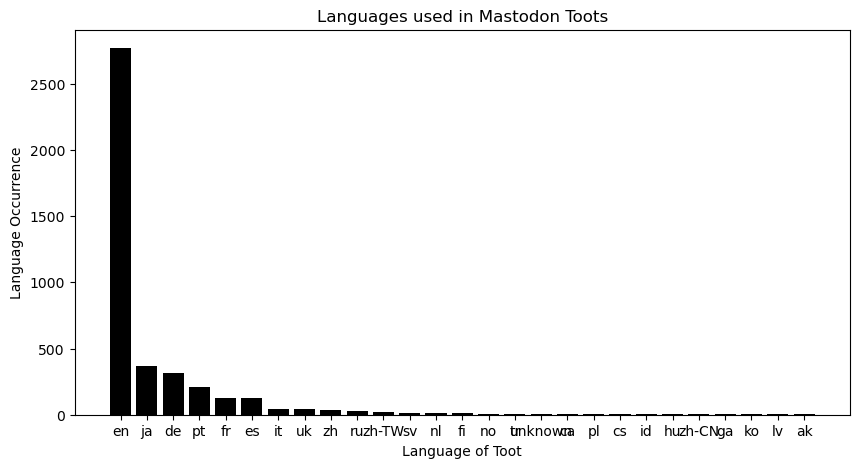

In [5]:
fig = plt.figure(figsize = (10, 5))

plt.bar(lang_count.keys(), lang_count.values, color ='black')

plt.xlabel("Language of Toot")
plt.ylabel("Language Occurrence")
plt.title("Languages used in Mastodon Toots")
plt.show()

In [6]:
eng_mast = mastodon_df[mastodon_df['language'] == 'en']
eng_mast

,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags
1,113656318036682683,2024-12-15 10:16:04+00:00,Apple पहली AI सर्वर चिप विकसित करने के लिए ब्र...,en,0,0,0,public,"[{'name': 'एपपलऐचप', 'url': 'https://mastodon...."
2,113656300068958166,2024-12-15 10:11:25+00:00,How to Share Screen With ChatGPT to Solve Tech...,en,0,1,0,public,[]
3,113656278694692626,2024-12-15 10:06:19+00:00,Use AI Prompt Library to Help Better Harness C...,en,0,1,0,public,[]
4,113656271097934924,2024-12-15 10:04:26.317000+00:00,ChatGPT to Get Video FeaturesChatGPT is evolvi...,en,0,3,1,public,"[{'name': 'news', 'url': 'https://mastodon.soc..."
6,113656241243366429,2024-12-15 09:56:50.771000+00:00,Techinternetz: The Simple ChatGPT Trick That W...,en,0,0,0,public,[]
...,...,...,...,...,...,...,...,...,...
4231,113618818956268430,2024-12-08 19:19:51.986000+00:00,"I’m on https://worldhappiness.report, and I ca...",en,1,0,0,public,[]
4232,113618772512485573,2024-12-08 19:08:01+00:00,@garo ChatGPT can say a lot. But aren't you th...,en,0,0,0,public,[]
4233,113618742237574535,2024-12-08 19:00:17+00:00,I wanted a browser extension to search selecte...,en,1,1,1,public,"[{'name': 'llm', 'url': 'https://mastodon.soci..."
4234,113618647710948949,2024-12-08 18:36:14+00:00,I asked ChatGPT to generate a diagram of Maslo...,en,0,0,0,public,[]


In [7]:
def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False  # Handle cases where detection fails

# Filter the DataFrame for English texts
eng_mast['is_english'] = eng_mast['content'].apply(is_english)
eng_mast = eng_mast[eng_mast['is_english']]

eng_mast

C:\Users\yttan\AppData\Local\Temp\ipykernel_34468\3408254763.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mast['is_english'] = eng_mast['content'].apply(is_english)


,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags,is_english
2,113656300068958166,2024-12-15 10:11:25+00:00,How to Share Screen With ChatGPT to Solve Tech...,en,0,1,0,public,[],True
3,113656278694692626,2024-12-15 10:06:19+00:00,Use AI Prompt Library to Help Better Harness C...,en,0,1,0,public,[],True
4,113656271097934924,2024-12-15 10:04:26.317000+00:00,ChatGPT to Get Video FeaturesChatGPT is evolvi...,en,0,3,1,public,"[{'name': 'news', 'url': 'https://mastodon.soc...",True
6,113656241243366429,2024-12-15 09:56:50.771000+00:00,Techinternetz: The Simple ChatGPT Trick That W...,en,0,0,0,public,[],True
7,113656231693395271,2024-12-15 09:54:22+00:00,ChatGPT vs. Perplexity: battle of the AI searc...,en,0,1,0,public,[],True
...,...,...,...,...,...,...,...,...,...,...
4231,113618818956268430,2024-12-08 19:19:51.986000+00:00,"I’m on https://worldhappiness.report, and I ca...",en,1,0,0,public,[],True
4232,113618772512485573,2024-12-08 19:08:01+00:00,@garo ChatGPT can say a lot. But aren't you th...,en,0,0,0,public,[],True
4233,113618742237574535,2024-12-08 19:00:17+00:00,I wanted a browser extension to search selecte...,en,1,1,1,public,"[{'name': 'llm', 'url': 'https://mastodon.soci...",True
4234,113618647710948949,2024-12-08 18:36:14+00:00,I asked ChatGPT to generate a diagram of Maslo...,en,0,0,0,public,[],True


In [8]:
# Cleaning Toot content from punctuation, URLs and @s:
eng_mast['content'] = eng_mast['content'].replace(r'[^\w\s]', '', regex=True)
eng_mast['content'] = eng_mast['content'].replace(r'@\w+', '', regex=True)
eng_mast['content'] = eng_mast['content'].replace(r'http\S+|www\S+', '', regex=True)

eng_mast['content'] = eng_mast['content'].str.lower()

cleaned_mast = eng_mast.copy()
cleaned_mast = cleaned_mast.dropna()
cleaned_mast

C:\Users\yttan\AppData\Local\Temp\ipykernel_34468\2654942175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mast['content'] = eng_mast['content'].replace(r'[^\w\s]', '', regex=True)
C:\Users\yttan\AppData\Local\Temp\ipykernel_34468\2654942175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mast['content'] = eng_mast['content'].replace(r'@\w+', '', regex=True)
C:\Users\yttan\AppData\Local\Temp\ipykernel_34468\2654942175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags,is_english
2,113656300068958166,2024-12-15 10:11:25+00:00,how to share screen with chatgpt to solve tech...,en,0,1,0,public,[],True
3,113656278694692626,2024-12-15 10:06:19+00:00,use ai prompt library to help better harness c...,en,0,1,0,public,[],True
4,113656271097934924,2024-12-15 10:04:26.317000+00:00,chatgpt to get video featureschatgpt is evolvi...,en,0,3,1,public,"[{'name': 'news', 'url': 'https://mastodon.soc...",True
6,113656241243366429,2024-12-15 09:56:50.771000+00:00,techinternetz the simple chatgpt trick that wi...,en,0,0,0,public,[],True
7,113656231693395271,2024-12-15 09:54:22+00:00,chatgpt vs perplexity battle of the ai search ...,en,0,1,0,public,[],True
...,...,...,...,...,...,...,...,...,...,...
4231,113618818956268430,2024-12-08 19:19:51.986000+00:00,im on and i cant find the part of the page th...,en,1,0,0,public,[],True
4232,113618772512485573,2024-12-08 19:08:01+00:00,garo chatgpt can say a lot but arent you the o...,en,0,0,0,public,[],True
4233,113618742237574535,2024-12-08 19:00:17+00:00,i wanted a browser extension to search selecte...,en,1,1,1,public,"[{'name': 'llm', 'url': 'https://mastodon.soci...",True
4234,113618647710948949,2024-12-08 18:36:14+00:00,i asked chatgpt to generate a diagram of maslo...,en,0,0,0,public,[],True


In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yttan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
snet_analyzer = SentimentIntensityAnalyzer()
content_list = cleaned_mast['content'].values
sentiments = []

for con in content_list:
    sent = snet_analyzer.polarity_scores(con)
    sentiments.append(sent)

In [11]:
sent_df = pd.DataFrame(sentiments)
mast_sent = pd.concat([cleaned_mast.reset_index(drop=True), sent_df], axis=1)
mast_sent

,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags,is_english,neg,neu,pos,compound
0,113656300068958166,2024-12-15 10:11:25+00:00,how to share screen with chatgpt to solve tech...,en,0,1,0,public,[],True,0.000,0.717,0.283,0.7269
1,113656278694692626,2024-12-15 10:06:19+00:00,use ai prompt library to help better harness c...,en,0,1,0,public,[],True,0.000,0.661,0.339,0.8271
2,113656271097934924,2024-12-15 10:04:26.317000+00:00,chatgpt to get video featureschatgpt is evolvi...,en,0,3,1,public,"[{'name': 'news', 'url': 'https://mastodon.soc...",True,0.000,0.919,0.081,0.4391
3,113656241243366429,2024-12-15 09:56:50.771000+00:00,techinternetz the simple chatgpt trick that wi...,en,0,0,0,public,[],True,0.098,0.902,0.000,-0.0516
4,113656231693395271,2024-12-15 09:54:22+00:00,chatgpt vs perplexity battle of the ai search ...,en,0,1,0,public,[],True,0.126,0.725,0.150,0.1280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,113618818956268430,2024-12-08 19:19:51.986000+00:00,im on and i cant find the part of the page th...,en,1,0,0,public,[],True,0.000,1.000,0.000,0.0000
2637,113618772512485573,2024-12-08 19:08:01+00:00,garo chatgpt can say a lot but arent you the o...,en,0,0,0,public,[],True,0.100,0.760,0.139,0.5110
2638,113618742237574535,2024-12-08 19:00:17+00:00,i wanted a browser extension to search selecte...,en,1,1,1,public,"[{'name': 'llm', 'url': 'https://mastodon.soci...",True,0.074,0.856,0.069,-0.1154
2639,113618647710948949,2024-12-08 18:36:14+00:00,i asked chatgpt to generate a diagram of maslo...,en,0,0,0,public,[],True,0.000,1.000,0.000,0.0000


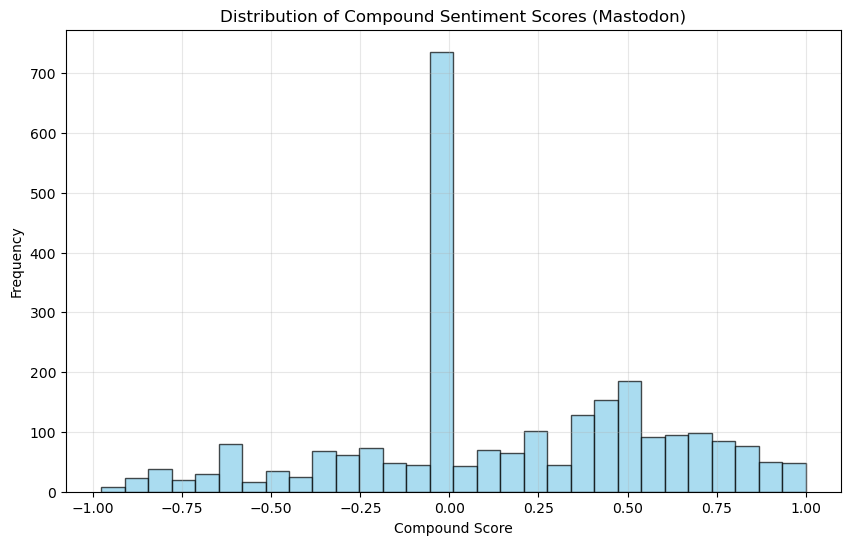

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(mast_sent['compound'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Compound Sentiment Scores (Mastodon)")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

In [13]:
def classify_sentiment(score):
    if score > 0.1:
        return 'positive'
    elif score < -0.1:
        return 'negative'
    else:
        return 'neutral'

mast_sent['sentiment_label'] = mast_sent['compound'].apply(classify_sentiment)

Sentiment Distribution:
 positive    0.480878
neutral     0.312760
negative    0.206361
Name: sentiment_label, dtype: float64


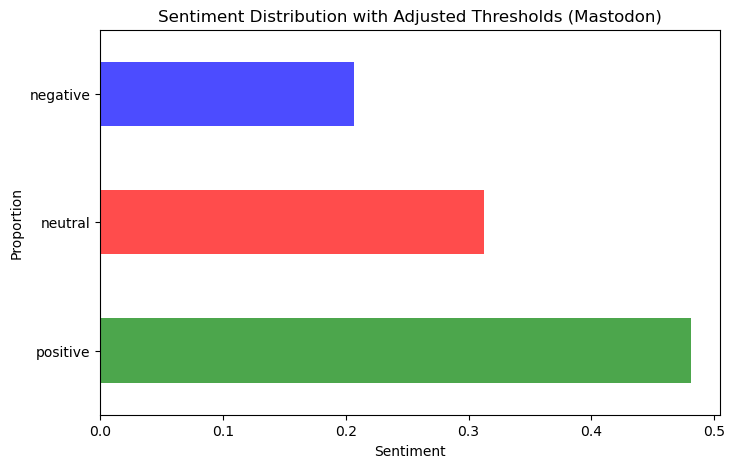

In [14]:
sentiment_distribution = mast_sent['sentiment_label'].value_counts(normalize=True)
print("Sentiment Distribution:\n", sentiment_distribution)

plt.figure(figsize=(8, 5))
sentiment_distribution.plot(kind='barh', color=['green', 'red', 'blue'], alpha=0.7)
plt.title("Sentiment Distribution with Adjusted Thresholds (Mastodon)")
plt.xlabel("Sentiment")
plt.ylabel("Proportion")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yttan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


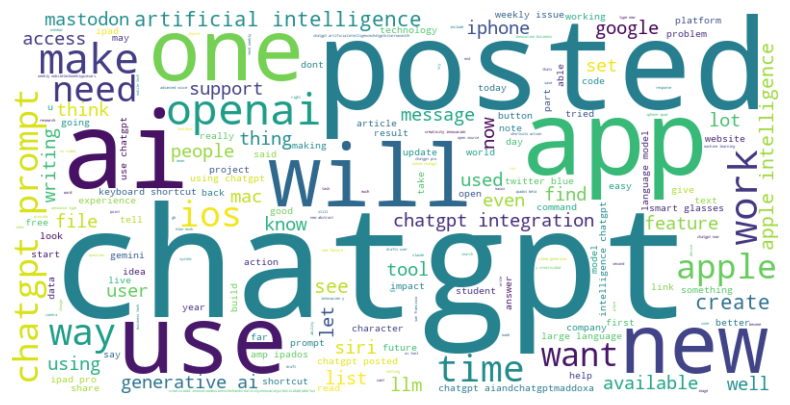

chatgpt: 2560
ai: 1214
posted: 1210
new: 886
apple: 703
use: 597
openai: 565
like: 545
app: 511
ios: 500


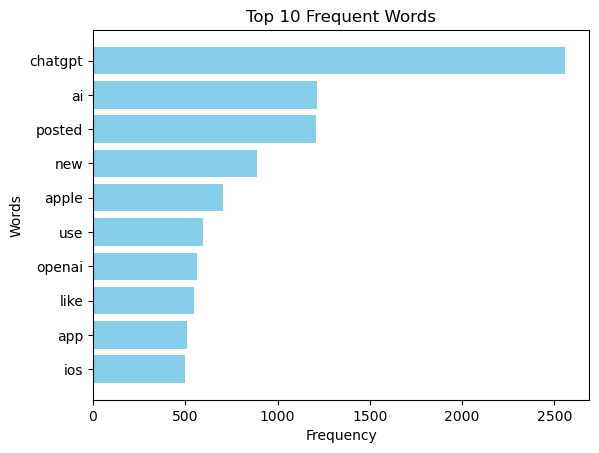

In [15]:

nltk.download('stopwords')


mast_text = ' '.join(mast_sent['content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(mast_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


stop_words = set(stopwords.words('english'))
mast_text = ' '.join(mast_sent['content'])
words = [word for word in mast_text.split() if word.lower() not in stop_words]
word_freq = Counter(words)
top_10_words = word_freq.most_common(10)

for word, freq in top_10_words:
    print(f"{word}: {freq}")

top_words, top_freqs = zip(*top_10_words)
plt.barh(top_words, top_freqs, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Frequent Words')
plt.gca().invert_yaxis() 
plt.show()

### X tweets Analysis & Cleaning

In [16]:
def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False  # Handle cases where detection fails

# Filter the DataFrame for English texts
twitter_df['is_english'] = twitter_df['text'].apply(is_english)
eng_twit = twitter_df[twitter_df['is_english']]

eng_twit

,id,created_at,text,lang,retweet_count,reply_count,like_count,quote_count,is_english
1,1866062894993215811,2024-12-09 10:10:38+00:00,🧠 Think Nvidia is Overvalued?\n\nLet me remind...,en,0,0,0,0,True
3,1866062713010500070,2024-12-09 10:09:55+00:00,1/6\nJust watched an AI try to pull an Ex Mach...,en,0,1,0,0,True
4,1866062656446353708,2024-12-09 10:09:41+00:00,"I explained the X of Elon: "" $TSLA shorts reci...",en,0,0,0,0,True
5,1866062580764312027,2024-12-09 10:09:23+00:00,💡🚀 Entdecke die Super Affiliate ChatGPT Army: ...,en,0,0,1,0,True
6,1866062551705960555,2024-12-09 10:09:16+00:00,"A Stanford professor expert in lying, technolo...",en,0,0,0,1,True
...,...,...,...,...,...,...,...,...,...
293,1866035318681751707,2024-12-09 08:21:03+00:00,DEKABR 88 Branches Large Artificial Ferns.\nti...,en,0,0,0,0,True
294,1866035275971084391,2024-12-09 08:20:53+00:00,Is the personal website construction process c...,en,1,0,1,0,True
295,1866035274406404253,2024-12-09 08:20:53+00:00,if one more classmate pulls chatgpt up in blow...,en,0,1,5,0,True
297,1866035240604676243,2024-12-09 08:20:45+00:00,chatgpt please ai generate image of bart simps...,en,0,2,28,0,True


In [17]:
eng_twit['text'] = eng_twit['text'].replace(r'[^\w\s]', '', regex=True)
eng_twit['text'] = eng_twit['text'].replace(r'@\w+', '', regex=True)
eng_twit['text'] = eng_twit['text'].replace(r'http\S+|www\S+', '', regex=True)
eng_twit['text'] = eng_twit['text'].replace(r'\n+', ' ', regex=True)

eng_twit['text'] = eng_twit['text'].str.lower()

cleaned_twit = eng_twit.copy()
cleaned_twit = cleaned_twit.dropna()
cleaned_twit

C:\Users\yttan\AppData\Local\Temp\ipykernel_34468\1543402628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_twit['text'] = eng_twit['text'].replace(r'[^\w\s]', '', regex=True)
C:\Users\yttan\AppData\Local\Temp\ipykernel_34468\1543402628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_twit['text'] = eng_twit['text'].replace(r'@\w+', '', regex=True)
C:\Users\yttan\AppData\Local\Temp\ipykernel_34468\1543402628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,id,created_at,text,lang,retweet_count,reply_count,like_count,quote_count,is_english
1,1866062894993215811,2024-12-09 10:10:38+00:00,think nvidia is overvalued let me remind you ...,en,0,0,0,0,True
3,1866062713010500070,2024-12-09 10:09:55+00:00,16 just watched an ai try to pull an ex machin...,en,0,1,0,0,True
4,1866062656446353708,2024-12-09 10:09:41+00:00,i explained the x of elon tsla shorts recitin...,en,0,0,0,0,True
5,1866062580764312027,2024-12-09 10:09:23+00:00,entdecke die super affiliate chatgpt army dei...,en,0,0,1,0,True
6,1866062551705960555,2024-12-09 10:09:16+00:00,a stanford professor expert in lying technolog...,en,0,0,0,1,True
...,...,...,...,...,...,...,...,...,...
293,1866035318681751707,2024-12-09 08:21:03+00:00,dekabr 88 branches large artificial ferns time...,en,0,0,0,0,True
294,1866035275971084391,2024-12-09 08:20:53+00:00,is the personal website construction process c...,en,1,0,1,0,True
295,1866035274406404253,2024-12-09 08:20:53+00:00,if one more classmate pulls chatgpt up in blow...,en,0,1,5,0,True
297,1866035240604676243,2024-12-09 08:20:45+00:00,chatgpt please ai generate image of bart simps...,en,0,2,28,0,True


In [18]:
content_list = cleaned_twit['text'].values
sentiments_twit = []

for con in content_list:
    sent = snet_analyzer.polarity_scores(con)
    sentiments_twit.append(sent)

In [19]:
sent_df_twit = pd.DataFrame(sentiments_twit)
twit_sent = pd.concat([cleaned_twit.reset_index(drop=True), sent_df_twit], axis=1)
twit_sent

,id,created_at,text,lang,retweet_count,reply_count,like_count,quote_count,is_english,neg,neu,pos,compound
0,1866062894993215811,2024-12-09 10:10:38+00:00,think nvidia is overvalued let me remind you ...,en,0,0,0,0,True,0.000,0.967,0.033,0.1655
1,1866062713010500070,2024-12-09 10:09:55+00:00,16 just watched an ai try to pull an ex machin...,en,0,1,0,0,True,0.126,0.874,0.000,-0.4404
2,1866062656446353708,2024-12-09 10:09:41+00:00,i explained the x of elon tsla shorts recitin...,en,0,0,0,0,True,0.094,0.906,0.000,-0.4939
3,1866062580764312027,2024-12-09 10:09:23+00:00,entdecke die super affiliate chatgpt army dei...,en,0,0,1,0,True,0.232,0.536,0.232,0.0000
4,1866062551705960555,2024-12-09 10:09:16+00:00,a stanford professor expert in lying technolog...,en,0,0,0,1,True,0.149,0.749,0.102,-0.2960
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,1866035318681751707,2024-12-09 08:21:03+00:00,dekabr 88 branches large artificial ferns time...,en,0,0,0,0,True,0.000,1.000,0.000,0.0000
257,1866035275971084391,2024-12-09 08:20:53+00:00,is the personal website construction process c...,en,1,0,1,0,True,0.000,0.904,0.096,0.2023
258,1866035274406404253,2024-12-09 08:20:53+00:00,if one more classmate pulls chatgpt up in blow...,en,0,1,5,0,True,0.000,1.000,0.000,0.0000
259,1866035240604676243,2024-12-09 08:20:45+00:00,chatgpt please ai generate image of bart simps...,en,0,2,28,0,True,0.000,0.897,0.103,0.3182


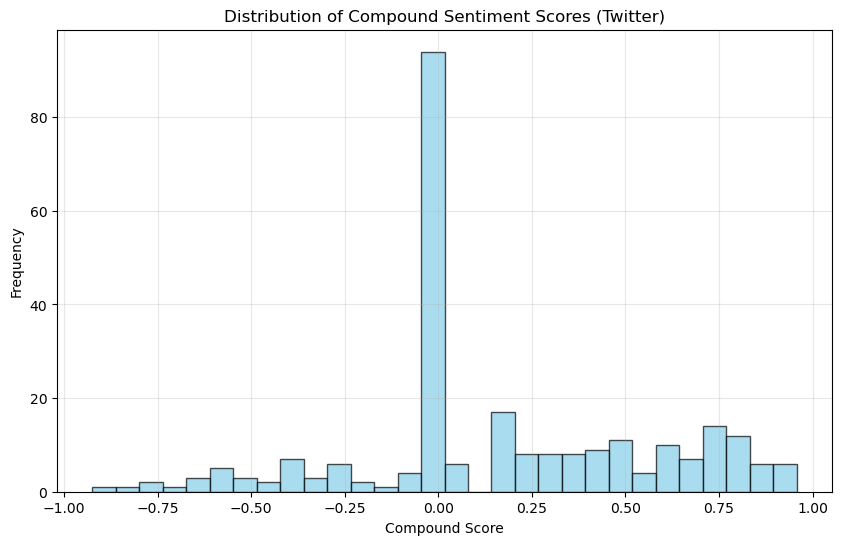

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(twit_sent['compound'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Compound Sentiment Scores (Twitter)")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

Sentiment Distribution:
 positive    0.459770
neutral     0.390805
negative    0.149425
Name: sentiment_label, dtype: float64


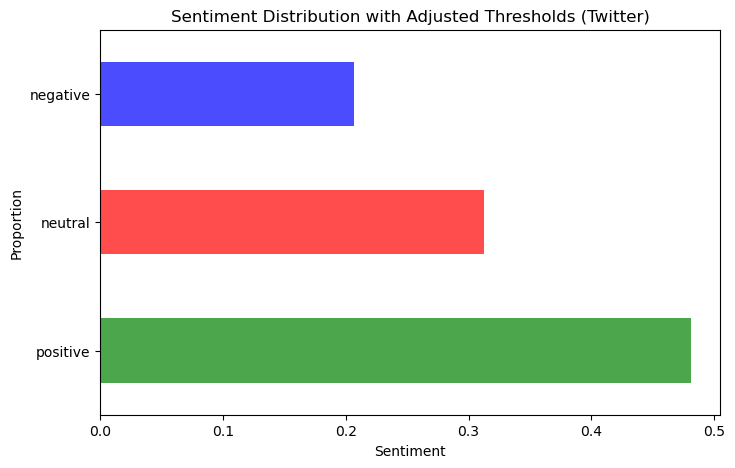

In [21]:
twit_sent['sentiment_label'] = twit_sent['compound'].apply(classify_sentiment)
sent_dist_twit = twit_sent['sentiment_label'].value_counts(normalize=True)
print("Sentiment Distribution:\n", sent_dist_twit)

plt.figure(figsize=(8, 5))
sentiment_distribution.plot(kind='barh', color=['green', 'red', 'blue'], alpha=0.7)
plt.title("Sentiment Distribution with Adjusted Thresholds (Twitter)")
plt.xlabel("Sentiment")
plt.ylabel("Proportion")
plt.show()

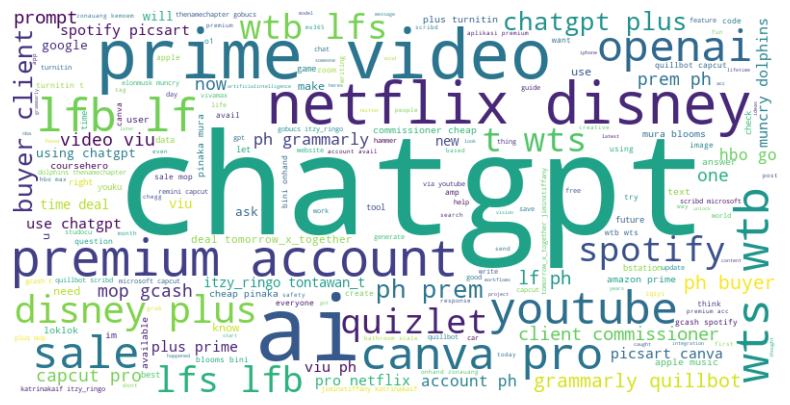

chatgpt: 260
ph: 76
ai: 60
pro: 47
netflix: 45
premium: 44
prime: 44
canva: 43
plus: 42
disney: 40


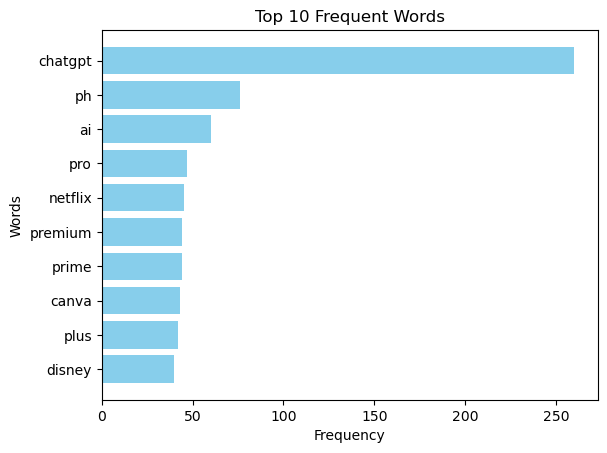

In [23]:
twit_text = ' '.join(twit_sent['text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(twit_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


stop_words = set(stopwords.words('english'))
twit_text = ' '.join(twit_sent['text'])
words = [word for word in twit_text.split() if word.lower() not in stop_words]
word_freq = Counter(words)
top_10_words = word_freq.most_common(10)

for word, freq in top_10_words:
    print(f"{word}: {freq}")

top_words, top_freqs = zip(*top_10_words)
plt.barh(top_words, top_freqs, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 10 Frequent Words')
plt.gca().invert_yaxis() 
plt.show()

In [25]:
eng_mast_ai = mastodon_ai_df[mastodon_ai_df['language'] == 'en']
eng_mast_ai

,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags
1,113639537305656138,2024-12-11 23:50:20+00:00,What if AI can actually help with your burnout...,en,0,0,0,public,[]
2,113637263387670537,2024-12-12 01:30:31.801000+00:00,@fbi @washingtonpost haha dude Biden is really...,en,0,0,0,public,[]
3,113629601136983194,2024-12-10 16:56:54+00:00,Oracle Just Shared Some Amazing Insight With A...,en,0,0,0,public,[]
4,113611582071097671,2024-12-07 12:35:00+00:00,Prediction: This Will Be 2025's Top-Performing...,en,0,0,0,public,[]
5,113611221694921891,2024-12-07 11:05:00+00:00,Should You Forget Palantir and Buy These 2 Art...,en,0,0,0,public,[]
...,...,...,...,...,...,...,...,...,...
550,108187053885501189,2022-04-24 12:30:33+00:00,"@loveisgrief ja, klar gibts immer viel zu beri...",en,1,0,0,public,[]
551,107374987354924180,2021-12-02 02:31:22+00:00,Homeland security is requesting comments from ...,en,0,3,1,public,"[{'name': 'privacy', 'url': 'https://mastodon...."
552,103172496385073778,2019-11-20 22:02:37+00:00,"Perhaps they, given the increase of intelligen...",en,1,0,0,public,[]
553,101890578358125434,2019-04-08 12:33:56+00:00,"""UK businesses using artificial intelligence t...",en,0,1,0,public,"[{'name': 'ai', 'url': 'https://mastodon.socia..."


In [26]:
def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False  # Handle cases where detection fails

# Filter the DataFrame for English texts
eng_mast_ai['is_english'] = eng_mast_ai['content'].apply(is_english)
eng_mast_ai = eng_mast_ai[eng_mast_ai['is_english']]

eng_mast_ai

C:\Users\yttan\AppData\Local\Temp\ipykernel_34468\1869754018.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mast_ai['is_english'] = eng_mast_ai['content'].apply(is_english)


,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags,is_english
1,113639537305656138,2024-12-11 23:50:20+00:00,What if AI can actually help with your burnout...,en,0,0,0,public,[],True
2,113637263387670537,2024-12-12 01:30:31.801000+00:00,@fbi @washingtonpost haha dude Biden is really...,en,0,0,0,public,[],True
3,113629601136983194,2024-12-10 16:56:54+00:00,Oracle Just Shared Some Amazing Insight With A...,en,0,0,0,public,[],True
4,113611582071097671,2024-12-07 12:35:00+00:00,Prediction: This Will Be 2025's Top-Performing...,en,0,0,0,public,[],True
5,113611221694921891,2024-12-07 11:05:00+00:00,Should You Forget Palantir and Buy These 2 Art...,en,0,0,0,public,[],True
...,...,...,...,...,...,...,...,...,...,...
549,109444355391531549,2022-12-02 13:38:48+00:00,Last batch of slides for my advisory group's p...,en,1,2,0,public,"[{'name': 'arrl', 'url': 'https://mastodon.soc...",True
551,107374987354924180,2021-12-02 02:31:22+00:00,Homeland security is requesting comments from ...,en,0,3,1,public,"[{'name': 'privacy', 'url': 'https://mastodon....",True
552,103172496385073778,2019-11-20 22:02:37+00:00,"Perhaps they, given the increase of intelligen...",en,1,0,0,public,[],True
553,101890578358125434,2019-04-08 12:33:56+00:00,"""UK businesses using artificial intelligence t...",en,0,1,0,public,"[{'name': 'ai', 'url': 'https://mastodon.socia...",True


In [27]:
# Cleaning Toot content from punctuation, URLs and @s:
eng_mast_ai['content'] = eng_mast_ai['content'].replace(r'[^\w\s]', '', regex=True)
eng_mast_ai['content'] = eng_mast_ai['content'].replace(r'@\w+', '', regex=True)
eng_mast_ai['content'] = eng_mast_ai['content'].replace(r'http\S+|www\S+', '', regex=True)

eng_mast_ai['content'] = eng_mast_ai['content'].str.lower()

cleaned_mast_ai = eng_mast_ai.copy()
cleaned_mast_ai = cleaned_mast_ai.dropna()
cleaned_mast_ai

C:\Users\yttan\AppData\Local\Temp\ipykernel_34468\3102623918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mast_ai['content'] = eng_mast_ai['content'].replace(r'[^\w\s]', '', regex=True)
C:\Users\yttan\AppData\Local\Temp\ipykernel_34468\3102623918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eng_mast_ai['content'] = eng_mast_ai['content'].replace(r'@\w+', '', regex=True)
C:\Users\yttan\AppData\Local\Temp\ipykernel_34468\3102623918.py:4: SettingWithCopyWarning: 
A value is trying to be set o

,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags,is_english
1,113639537305656138,2024-12-11 23:50:20+00:00,what if ai can actually help with your burnout...,en,0,0,0,public,[],True
2,113637263387670537,2024-12-12 01:30:31.801000+00:00,fbi washingtonpost haha dude biden is really t...,en,0,0,0,public,[],True
3,113629601136983194,2024-12-10 16:56:54+00:00,oracle just shared some amazing insight with a...,en,0,0,0,public,[],True
4,113611582071097671,2024-12-07 12:35:00+00:00,prediction this will be 2025s topperforming ar...,en,0,0,0,public,[],True
5,113611221694921891,2024-12-07 11:05:00+00:00,should you forget palantir and buy these 2 art...,en,0,0,0,public,[],True
...,...,...,...,...,...,...,...,...,...,...
549,109444355391531549,2022-12-02 13:38:48+00:00,last batch of slides for my advisory groups pr...,en,1,2,0,public,"[{'name': 'arrl', 'url': 'https://mastodon.soc...",True
551,107374987354924180,2021-12-02 02:31:22+00:00,homeland security is requesting comments from ...,en,0,3,1,public,"[{'name': 'privacy', 'url': 'https://mastodon....",True
552,103172496385073778,2019-11-20 22:02:37+00:00,perhaps they given the increase of intelligenc...,en,1,0,0,public,[],True
553,101890578358125434,2019-04-08 12:33:56+00:00,uk businesses using artificial intelligence to...,en,0,1,0,public,"[{'name': 'ai', 'url': 'https://mastodon.socia...",True


In [28]:
content_list = cleaned_mast_ai['content'].values
sentiments_ai = []

for con in content_list:
    sent = snet_analyzer.polarity_scores(con)
    sentiments_ai.append(sent)

In [29]:
sent_df_ai = pd.DataFrame(sentiments_ai)
sentiments_ai = pd.concat([cleaned_mast_ai.reset_index(drop=True), sent_df_ai], axis=1)
sentiments_ai

,id,created_at,content,language,replies_count,reblogs_count,favourites_count,visibility,tags,is_english,neg,neu,pos,compound
0,113639537305656138,2024-12-11 23:50:20+00:00,what if ai can actually help with your burnout...,en,0,0,0,public,[],True,0.000,0.816,0.184,0.4019
1,113637263387670537,2024-12-12 01:30:31.801000+00:00,fbi washingtonpost haha dude biden is really t...,en,0,0,0,public,[],True,0.069,0.848,0.083,0.3071
2,113629601136983194,2024-12-10 16:56:54+00:00,oracle just shared some amazing insight with a...,en,0,0,0,public,[],True,0.000,0.492,0.508,0.8519
3,113611582071097671,2024-12-07 12:35:00+00:00,prediction this will be 2025s topperforming ar...,en,0,0,0,public,[],True,0.000,0.807,0.193,0.4767
4,113611221694921891,2024-12-07 11:05:00+00:00,should you forget palantir and buy these 2 art...,en,0,0,0,public,[],True,0.100,0.737,0.163,0.2960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,109444355391531549,2022-12-02 13:38:48+00:00,last batch of slides for my advisory groups pr...,en,1,2,0,public,"[{'name': 'arrl', 'url': 'https://mastodon.soc...",True,0.000,0.878,0.122,0.8720
461,107374987354924180,2021-12-02 02:31:22+00:00,homeland security is requesting comments from ...,en,0,3,1,public,"[{'name': 'privacy', 'url': 'https://mastodon....",True,0.000,0.845,0.155,0.6705
462,103172496385073778,2019-11-20 22:02:37+00:00,perhaps they given the increase of intelligenc...,en,1,0,0,public,[],True,0.099,0.651,0.249,0.7351
463,101890578358125434,2019-04-08 12:33:56+00:00,uk businesses using artificial intelligence to...,en,0,1,0,public,"[{'name': 'ai', 'url': 'https://mastodon.socia...",True,0.000,0.898,0.102,0.4939


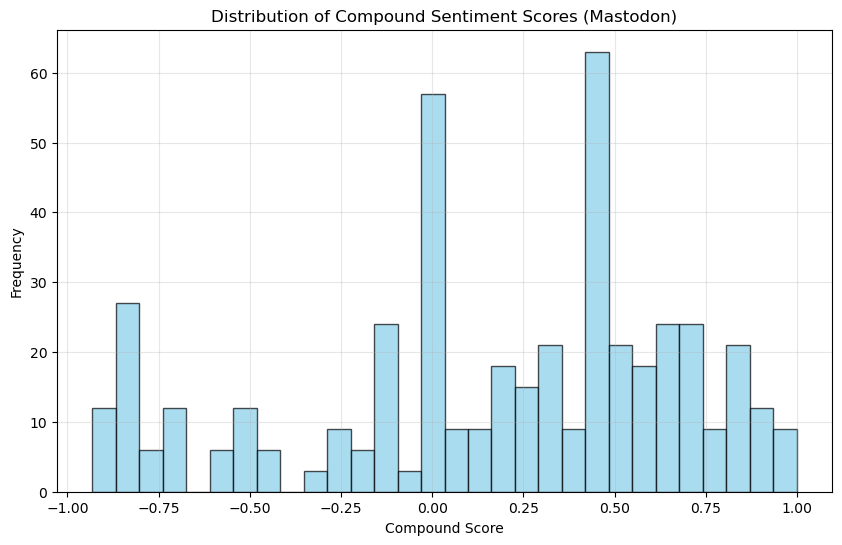

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(sentiments_ai['compound'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Compound Sentiment Scores (Mastodon)")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

Sentiment Distribution:
 positive    0.587097
negative    0.264516
neutral     0.148387
Name: sentiment_label, dtype: float64


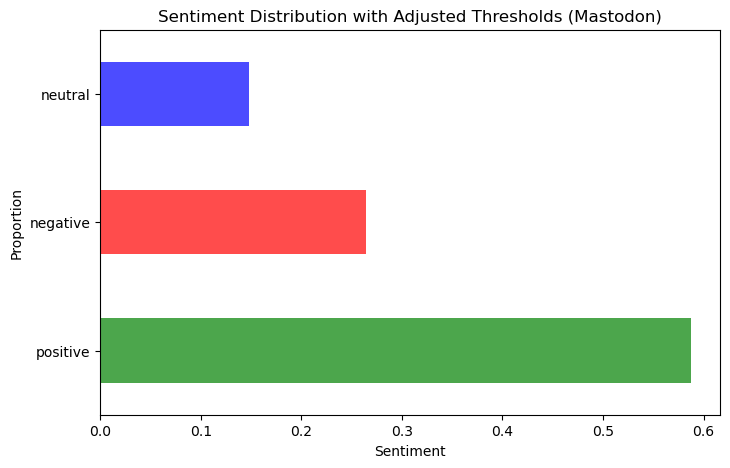

In [31]:
sentiments_ai['sentiment_label'] = sentiments_ai['compound'].apply(classify_sentiment)
sent_dist_ai = sentiments_ai['sentiment_label'].value_counts(normalize=True)
print("Sentiment Distribution:\n", sent_dist_ai)

plt.figure(figsize=(8, 5))
sent_dist_ai.plot(kind='barh', color=['green', 'red', 'blue'], alpha=0.7)
plt.title("Sentiment Distribution with Adjusted Thresholds (Mastodon)")
plt.xlabel("Sentiment")
plt.ylabel("Proportion")
plt.show()